In [2]:
# Initialize Otter
import otter
grader = otter.Notebook("project2.ipynb")

In [3]:
# Run this cell to set up the notebook.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines make plots look nice and hide some messy Python warnings.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)
warnings.simplefilter('ignore', np.VisibleDeprecationWarning)

# For interactive visualizations
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Import our table cleaning functions
from table_cleaner import * 

https://violationtracker.goodjobsfirst.org

Violation tracker is a database on corporate misconduct. This data set includes environmental violations from companies operating in the oil and gas industries, as reporeted by the federal Environmental Protection Agency.

In [4]:
from table_cleaner import * 

In [5]:
envi_v = Table().read_table("oil_and_gas.csv")
envi_v = envi_v.select("Company", "Current Parent Company", "Penalty Amount", "Penalty Year", "Penalty Date", "Description", "Current Parent HQ Country","Info Source", "Civil/Criminal")    

In [6]:
envi = valid_rows_for_column(envi_v, "Company", str)
envi= valid_rows_for_column(envi, "Current Parent Company", str)
envi = valid_rows_for_column(envi, "Penalty Amount", int)
envi = valid_rows_for_column(envi, "Penalty Year", int)
envi = valid_rows_for_column(envi, "Penalty Date", int)
envi = valid_rows_for_column(envi, "Current Parent HQ Country", str)
envi = valid_rows_for_column(envi,"Info Source", str)   
envi = valid_rows_for_column(envi, "Civil/Criminal", str)
# Didn't include the Description column since it includes ints and strings,
# It won't be used in the data analysis, but includes interesting information. 
rows_removed = envi_v.num_rows - envi.num_rows
print()
print('Removed a total of', rows_removed, 'rows.')
envi

Removed 0 bad row(s) for column Company
Removed 0 bad row(s) for column Current Parent Company
Removed 0 bad row(s) for column Penalty Amount
Removed 0 bad row(s) for column Penalty Year
Removed 0 bad row(s) for column Penalty Date
Removed 0 bad row(s) for column Current Parent HQ Country
Removed 0 bad row(s) for column Info Source
Removed 0 bad row(s) for column Civil/Criminal

Removed a total of 0 rows.


Company,Current Parent Company,Penalty Amount,Penalty Year,Penalty Date,Description,Current Parent HQ Country,Info Source,Civil/Criminal
Anadarko Petroleum Co.,Occidental Petroleum,9050000,2009,20090507,Anadarko Petroleum Co. and two related oil production co ...,USA,https://www.justice.gov/opa/pr/anadarko-petroleum-co-agr ...,civil
Anadarko Petroleum Corp.,Occidental Petroleum,5150000000,2015,20150123,A settlement reached with Anadarko Petroleum Corp.and Ke ...,USA,http://www.justice.gov/opa/pr/historic-515-billion-envir ...,civil
Atlantic Richfield,BP,21000000,2013,20130911,A past cost settlement with Atlantic Richfield to reimbu ...,United Kingdom,http://www2.epa.gov/enforcement/case-summary-atlantic-ri ...,civil
BP,BP,660000000,2001,20010118,To resolve a Clean Air Act case involving eight refineri ...,United Kingdom,https://www.justice.gov/archive/opa/pr/2001/January/028e ...,civil
BP America,BP,426500,2011,20111129,The U.S. Environmental Protection Agency announced that ...,United Kingdom,http://www2.epa.gov/enforcement/bp-financial-assurance-s ...,civil
BP Exploration (Alaska) Inc.,BP,22500000,2000,20000201,BP Exploration (Alaska) Inc. was sentenced for failing t ...,United Kingdom,https://www.justice.gov/archive/opa/pr/2000/February/047 ...,criminal
BP North America Inc.,BP,408000000,2012,20120523,The Department of Justice and the U.S. Environmental Pro ...,United Kingdom,http://www.justice.gov/opa/pr/bp-agrees-add-more-400-mil ...,civil
"BP Products North America, Inc.",BP,210000,2012,20120927,"BP Products North America, Inc. will pay a $210,000 pena ...",United Kingdom,http://www.justice.gov/opa/pr/bp-products-north-america- ...,civil
British Petroleum,BP,20000000,2007,20071025,"BP agreed to pay $12 million in criminal fines, $4 milli ...",United Kingdom,https://www.justice.gov/archive/opa/pr/2007/October/07_a ...,criminal
Chesapeake Appalachia LLC,Chesapeake Energy,9700000,2013,20131219,The U.S. Environmental Protection Agency and the Departm ...,USA,http://www2.epa.gov/enforcement/chesapeake-appalachia-ll ...,civil


In [7]:
print("Number of rows:", envi.num_rows)

Number of rows: 1002


In [8]:
envi = envi.sort("Penalty Year")
pen_date = envi.apply(str, "Penalty Date")

def get_month(dates):
    month = make_array()
    for i in dates:
        new_month = i[4:6]
        month = np.append(month, new_month)
    return month
month = get_month(pen_date)
envi = envi.with_columns("Month", month)
month = envi.apply(int, "Month")
envi = envi.with_columns("Penalty Month", month).drop("Month")
month

array([2, 8, 4, ..., 1, 9, 2])

In [9]:
def get_day(dates):
    day = make_array()
    for i in dates:
        new_day = i[6:8]
        day = np.append(day, new_day)
    return day
day = get_day(pen_date)
envi = envi.with_columns("Day", day)
day = envi.apply(int, "Day")
envi = envi.with_columns("Penalty Day", day).drop("Day")
day

array([ 1, 23, 21, ..., 28,  1,  3])

In [10]:
envi = envi.sort("Penalty Day")
envi = envi.sort("Penalty Month")
envi = envi.sort("Penalty Year")
envi

Company,Current Parent Company,Penalty Amount,Penalty Year,Penalty Date,Description,Current Parent HQ Country,Info Source,Civil/Criminal,Penalty Month,Penalty Day
"CONOCO, INC.",Phillips 66,21553,2000,20000110,nan,USA,Extracted from a download of the EPA's Enforcement and C ...,civil,1,10
BP Exploration (Alaska) Inc.,BP,22500000,2000,20000201,BP Exploration (Alaska) Inc. was sentenced for failing t ...,United Kingdom,https://www.justice.gov/archive/opa/pr/2000/February/047 ...,criminal,2,1
IRVING OIL CORP,Irving Oil,5000,2000,20000208,nan,Canada,Extracted from a download of the EPA's Enforcement and C ...,civil,2,8
ULTRAMAR DIAMOND SHAMROCK,Valero Energy,33751,2000,20000208,nan,USA,Extracted from a download of the EPA's Enforcement and C ...,civil,2,8
CHEVRON U.S.A. PRODUCTION COMPANY,Chevron,5000,2000,20000229,nan,USA,Extracted from a download of the EPA's Enforcement and C ...,civil,2,29
"BP EXPLORATION, INC.",BP,34650,2000,20000315,nan,United Kingdom,Extracted from a download of the EPA's Enforcement and C ...,civil,3,15
"ARCO ALASKA, INC.",BP,31500,2000,20000315,nan,United Kingdom,Extracted from a download of the EPA's Enforcement and C ...,civil,3,15
TPI Petroleum Inc.,Valero Energy,13900000,2000,20000421,TPI Petroleum Inc. agreed to pay a $4 million civil pena ...,USA,https://www.justice.gov/archive/opa/pr/2000/April/222enr ...,civil,4,21
PARAMOUNT PETROLEUM CORPORATION OF AZ,Delek,54000,2000,20000427,nan,Israel,Extracted from a download of the EPA's Enforcement and C ...,civil,4,27
EXXON MOBIL PIPELINE COMPANY,Exxon Mobil,8000,2000,20000511,nan,USA,Extracted from a download of the EPA's Enforcement and C ...,civil,5,11


In [11]:
def get_date(row):
    yr = str(row.column("Penalty Year"))
    mo = str(row.column("Penalty Month"))
    da = str(row.column("Penalty Day"))
    return yr + "/" + mo + "/" + da
earliest_penalty = get_date(envi.take(0))
latest_penalty = get_date(envi.take(1001))
print("Earliest penalty:", earliest_penalty)
print("Latest penalty:", latest_penalty)

Earliest penalty: [2000]/[1]/[10]
Latest penalty: [2022]/[9]/[1]


In [12]:
violations_per_year = envi.group("Penalty Year")
violations_per_year = violations_per_year.sort("count", descending = True)
violations_per_year

Penalty Year,count
2015,72
2012,71
2013,64
2005,62
2014,59
2011,57
2001,54
2002,50
2019,48
2016,45


There are 1002 different violations described by the data, (as there's 1002 rows). Spanning vioaltions from 2000 to 2022.
The earliest violation recorded on the data occured on 10/1/2000 by CONOCO inc.
The latest violation on the data occured on 9/1/2022 by Shell Chemicals.
The most violations are recorded in 2015 with a total of 72. 
The least violations are recorded in 2022 with a total of 10. (This could be due to the fact that 2022 still has not ended, so as much data for this year has not been gathered. Excluding 2022, the least violations were recorded in 2020.


In [13]:
#function will return the violations for a certain company
def get_violations(company):
    tbl = envi.where("Company", are.equal_to(company))
    return tbl

#function will return the violations for a certain parent company
def get_violations_parent(parent):
    tbl = envi.where("Current Parent Company", are.equal_to(parent))
    return tbl
get_violations("CONOCO, INC.")

Company,Current Parent Company,Penalty Amount,Penalty Year,Penalty Date,Description,Current Parent HQ Country,Info Source,Civil/Criminal,Penalty Month,Penalty Day
"CONOCO, INC.",Phillips 66,21553,2000,20000110,nan,USA,Extracted from a download of the EPA's Enforcement and C ...,civil,1,10
"CONOCO, INC.",ConocoPhillips,138775,2002,20020219,nan,USA,Extracted from a download of the EPA's Enforcement and C ...,civil,2,19
"CONOCO, INC.",Phillips 66,119000,2002,20020311,nan,USA,Extracted from a download of the EPA's Enforcement and C ...,civil,3,11
"CONOCO, INC.",Phillips 66,3651000,2002,20020430,nan,USA,Extracted from a download of the EPA's Enforcement and C ...,civil,4,30


In [14]:
#count the number of violations for all companies and their parent companies

vls = make_array()
for i in envi.column("Company"):
    vls = np.append(vls, (get_violations(i).num_rows))

bls = make_array()
for i in envi.column("Current Parent Company"):
    bls = np.append(bls, (get_violations_parent(i).num_rows))

In [15]:
#table of the number of violations for all companies and their parents
envi_violations = envi.with_columns("Number of Violations", vls, "Parent's Violations", bls)

envi_violations = envi_violations.select("Company", "Number of Violations", "Current Parent Company", "Parent's Violations")
envi_violations
    

Company,Number of Violations,Current Parent Company,Parent's Violations
"CONOCO, INC.",4,Phillips 66,38
BP Exploration (Alaska) Inc.,1,BP,63
IRVING OIL CORP,2,Irving Oil,7
ULTRAMAR DIAMOND SHAMROCK,2,Valero Energy,47
CHEVRON U.S.A. PRODUCTION COMPANY,1,Chevron,81
"BP EXPLORATION, INC.",1,BP,63
"ARCO ALASKA, INC.",1,BP,63
TPI Petroleum Inc.,1,Valero Energy,47
PARAMOUNT PETROLEUM CORPORATION OF AZ,1,Delek,21
EXXON MOBIL PIPELINE COMPANY,1,Exxon Mobil,66


In [17]:
def get_first_violation(company):
    penalty = get_violations(company).column("Penalty Amount").item(0)
    return penalty
pens = make_array()  #initial penalty amount
num = make_array()   #number of violations after first penalty
for i in envi.column("Company"):
    pens = np.append(pens, get_first_violation(i))
    num = (np.append(num, (get_violations(i).num_rows)-1))
envi_violations = envi_violations.with_columns("First Violation Penalty Amount", pens, "Number of Additional Violations", num)
envi_violations

Company,Number of Violations,Current Parent Company,Parent's Violations,First Violation Penalty Amount,Number of Additional Violations
"CONOCO, INC.",4,Phillips 66,38,21553,3
BP Exploration (Alaska) Inc.,1,BP,63,2.25e+07,0
IRVING OIL CORP,2,Irving Oil,7,5000,1
ULTRAMAR DIAMOND SHAMROCK,2,Valero Energy,47,33751,1
CHEVRON U.S.A. PRODUCTION COMPANY,1,Chevron,81,5000,0
"BP EXPLORATION, INC.",1,BP,63,34650,0
"ARCO ALASKA, INC.",1,BP,63,31500,0
TPI Petroleum Inc.,1,Valero Energy,47,1.39e+07,0
PARAMOUNT PETROLEUM CORPORATION OF AZ,1,Delek,21,54000,0
EXXON MOBIL PIPELINE COMPANY,1,Exxon Mobil,66,8000,0


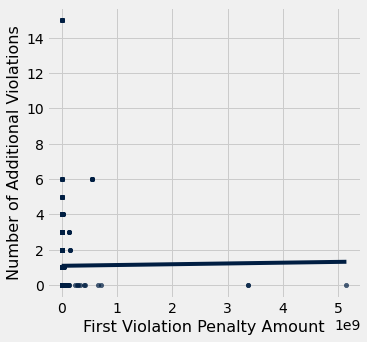

In [18]:
envi_violations.scatter("First Violation Penalty Amount", "Number of Additional Violations", fit_line = True)

In [19]:
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np
import sys
import warnings
warnings.simplefilter(action='ignore', category=np.VisibleDeprecationWarning)

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

Penalty Amount,Civil/Criminal
21553,civil
22500000,criminal
5000,civil
33751,civil


Civil/Criminal,count
civil,985
civil and criminal,1
criminal,16


/opt/tljh/user/lib/python3.9/site-packages/datascience/tables.py:5206: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(ticks, rotation='vertical')


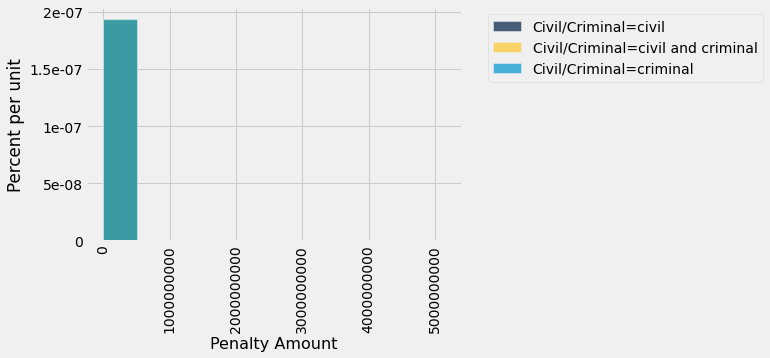

In [20]:
penalty_and_type = envi.select("Penalty Amount", "Civil/Criminal")
penalty_and_type.show(4)
penalty_and_type.group("Civil/Criminal").show()
penalty_and_type.hist("Penalty Amount", group = "Civil/Criminal")

In [21]:
means_table = penalty_and_type.group("Civil/Criminal", np.mean)
means_table.show()
means = means_table.column("Penalty Amount mean")
observed_difference = means.item(2) - means.item(0)  #will only compare civil vs criminal (civil&criminal not included)
observed_difference 

Civil/Criminal,Penalty Amount mean
civil,2.00527e+07
civil and criminal,3.5e+07
criminal,1.01594e+07


-9893324.184771575

In [22]:
def abs_difference_of_means(table, group_label, value_label):

    # table containing group means
    means_table = table.group(group_label, np.mean)
    
    # array of group means
    means = means_table.column(value_label + ' mean')
    
    #will only compare civil vs criminal (civil&criminal not included)
    return abs(means.item(2) - means.item(0))

In [23]:
def permutation_sample(table, group_column_name):
    """
    Returns: The table with a new "Shuffled Label" column containing
    the shuffled values of the group column.
    """
    
    # array of shuffled labels
    shuffled_labels = table.sample(with_replacement=False).column(group_column_name)
    
    # table of numerical variable and shuffled labels
    shuffled_table = table.with_column('Shuffled Label', shuffled_labels)
    
    return shuffled_table

In [24]:
original_and_shuffled = permutation_sample(penalty_and_type, "Civil/Criminal")
original_and_shuffled.show(4)
one_trial = abs_difference_of_means(original_and_shuffled, 'Shuffled Label', 'Penalty Amount')
one_trial

Penalty Amount,Civil/Criminal,Shuffled Label
21553,civil,civil
22500000,criminal,civil
5000,civil,civil
33751,civil,civil


19666707.536675125

In [25]:
def simulate_penalty_amounts(num_trials):
    
    penalty_amount_sim_stats = make_array()
    
    for i in np.arange(0, num_trials): 

        one_sample = permutation_sample(penalty_and_type, "Civil/Criminal")
        statistic_one_sample = abs(abs_difference_of_means(one_sample, 
                                                           "Shuffled Label", 
                                                           "Penalty Amount"))

        penalty_amount_sim_stats = np.append(penalty_amount_sim_stats, 
                                                      statistic_one_sample)
        
    return penalty_amount_sim_stats

In [26]:
simulated_penalty_amount_diffs = simulate_penalty_amounts(1000)

Write text here.

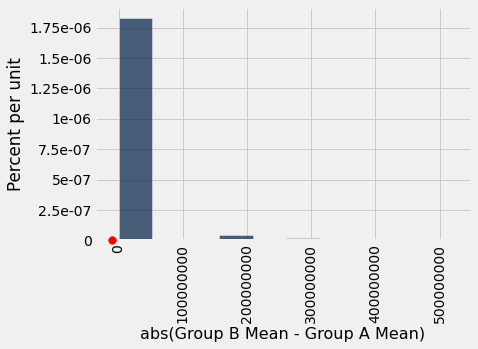

In [27]:
results = Table().with_column('abs(Group B Mean - Group A Mean)', simulated_penalty_amount_diffs)
results.hist()
plots.scatter(observed_difference, 0, color='red', s=60, zorder=3, clip_on=False);

In [28]:
#p-value
sum(simulated_penalty_amount_diffs >= observed_difference) / len(simulated_penalty_amount_diffs)

1.0

As far as ethics go, this data set is pretty ethically sound. All of this information is public knowledge and although it could be argued this information could be viewed as "slanderous", the positives do outweigh the negatives. Large companies are choosing to negatively impact the environment and releasing this information to the public brings awareness to the offenses and allows it to be used for environmental research and prevention.

Originally with this data set, we were seeking to explore if companies were more likely to receive a second offense after the first one. This question could help us answer if fines were effective in preventing environmental offenses and examine the effects of fines on companies' future actions. Unfortunately, with the provided data we were unable to properly explore this question and instead formulated two more: Are fines monetarily increasing as the years go on? And Is the penalty amount impacted by the case being criminal or civil?
The penalty amount for each violation was not dependent on whether the offense was criminal or civil based on our permutation test. There were significantly more civil than criminal offenses which was a limitation in our data set and could have prevented a proper comparison. 
The data yielded that fines and penalty years had a small positive correlation. As discussed in the statistical inference section, these variables appear to be correlated but there is not enough evidence to support causation. There is most likely a third variable at play such as EPA strictness or perhaps an increasing lack of care for the environment on the companies’ side. When investigating this relationship, we ran into a few difficulties. One being we were unable to use the mean as a comparative measure due to significant outliers in the dataset that pulled the average up. Instead we used the median as our “middle” marker to give us a more accurate representation of the data. 
Going forward, this research can be used to apply the same techniques to different industries (rather than just oil and gas) as well as different protection agencies. We would also like to examine years preceding 2000 to be able to evaluate trends in the data set.